# KMeans

In [59]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [60]:
x = data.drop(['labels'], axis='columns')
x1, x2 = x.loc[:, 'V1'], x.loc[:, 'V2']
y = data.loc[:, 'labels']
pd.Series.value_counts(y)

labels
2    1156
1     954
0     890
Name: count, dtype: int64

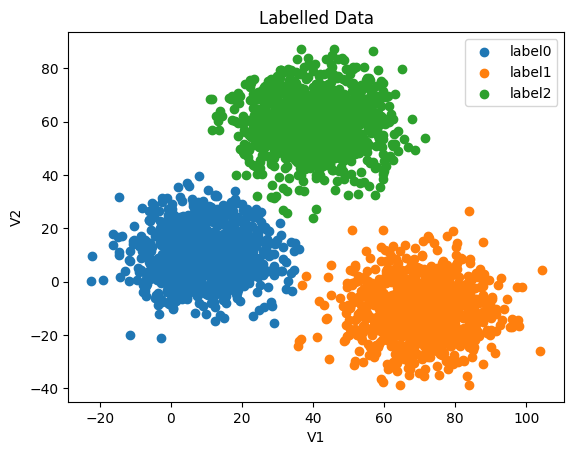

In [61]:
from matplotlib import pyplot as plt

fig1 = plt.figure()
label0 = plt.scatter(x1[y == 0], x2[y == 0])
label1 = plt.scatter(x1[y == 1], x2[y == 1])
label2 = plt.scatter(x1[y == 2], x2[y == 2])
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.title("Labelled Data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

In [62]:
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=3, random_state=0)
KM.fit(x)

KMeans(n_clusters=3, random_state=0)

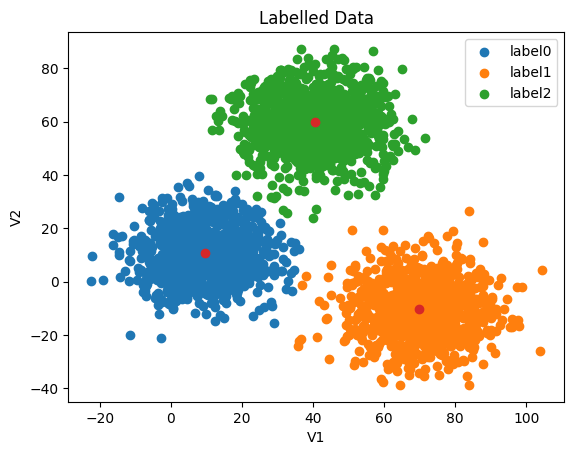

In [63]:
centers = KM.cluster_centers_
fig2 = plt.figure()
label0 = plt.scatter(x1[y == 0], x2[y == 0])
label1 = plt.scatter(x1[y == 1], x2[y == 1])
label2 = plt.scatter(x1[y == 2], x2[y == 2])
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.title("Labelled Data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.scatter(centers[:, 0], centers[:, 1])

In [64]:
test_data = pd.DataFrame({'V1': [80], 'V2': [60]})
test_predict = KM.predict(test_data)
print(test_predict)

[0]


In [65]:
y_predict = KM.predict(x)
print(pd.Series.value_counts(y_predict))

0    1149
1     952
2     899
Name: count, dtype: int64


In [66]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.31966666666666665


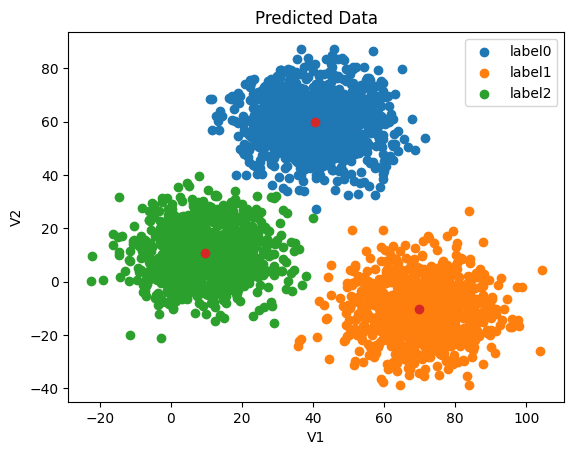

In [67]:
fig3 = plt.figure()
label0 = plt.scatter(x1[y_predict == 0], x2[y_predict == 0])
label1 = plt.scatter(x1[y_predict == 1], x2[y_predict == 1])
label2 = plt.scatter(x1[y_predict == 2], x2[y_predict == 2])
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.title("Predicted Data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.scatter(centers[:, 0], centers[:, 1])

In [68]:
y_corrected = []
for i in y_predict:
    if i == 0:
        y_corrected.append(2)
    elif i == 2:
        y_corrected.append(0)
    else:
        y_corrected.append(1)
y_corrected = np.array(y_corrected)

accuracy = accuracy_score(y, y_corrected)
print(accuracy)

0.997


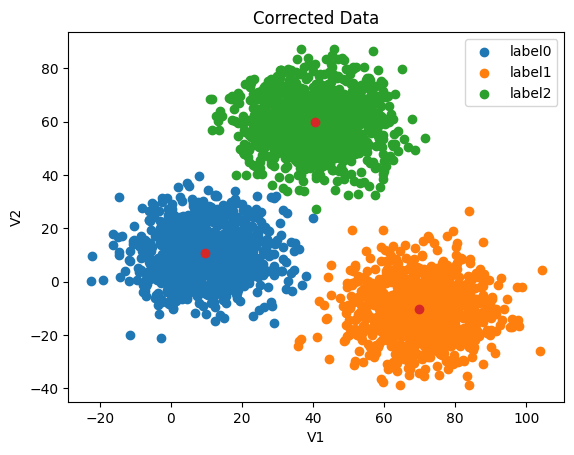

In [69]:
fig4 = plt.figure()
label0 = plt.scatter(x1[y_corrected == 0], x2[y_corrected == 0])
label1 = plt.scatter(x1[y_corrected == 1], x2[y_corrected == 1])
label2 = plt.scatter(x1[y_corrected == 2], x2[y_corrected == 2])
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.title("Corrected Data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.scatter(centers[:, 0], centers[:, 1])

# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [72]:
test_predict = KNN.predict(test_data)
print(test_predict)

[2]


In [74]:
y_predict = KNN.predict(x)
accuracy = accuracy_score(y, y_predict)
print(accuracy)

1.0


In [75]:
print(pd.Series.value_counts(y_predict))

2    1156
1     954
0     890
Name: count, dtype: int64


# Means-Shift

In [87]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(x)
print(bandwidth)

29.872307993539867


In [88]:
MS = MeanShift(bandwidth=bandwidth)
MS.fit(x)

MeanShift(bandwidth=29.872307993539867)

In [89]:
y_predict = MS.predict(x)
print(pd.Series.value_counts(y_predict))

0    1149
1     952
2     899
Name: count, dtype: int64


In [90]:
y_corrected = []
for i in y_predict:
    if i == 0:
        y_corrected.append(2)
    elif i == 2:
        y_corrected.append(0)
    else:
        y_corrected.append(1)
y_corrected = np.array(y_corrected)

In [91]:
accuracy = accuracy_score(y, y_corrected)
print(accuracy)

0.997


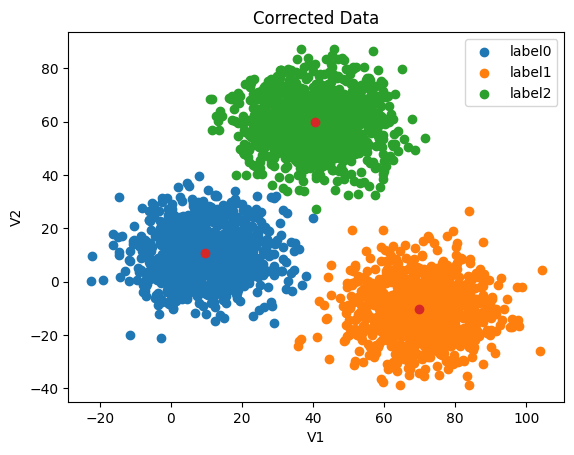

In [93]:
fig5 = plt.figure()
label0 = plt.scatter(x1[y_corrected == 0], x2[y_corrected == 0])
label1 = plt.scatter(x1[y_corrected == 1], x2[y_corrected == 1])
label2 = plt.scatter(x1[y_corrected == 2], x2[y_corrected == 2])
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.title("Corrected Data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.scatter(centers[:, 0], centers[:, 1])